<a href="https://colab.research.google.com/github/Lokaiahgarisaibhargav/Breast-Cancer-Detection-using-Machine-Learning/blob/main/BreastCancerprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import shutil

original_data_dir = '/content/drive/MyDrive/dataset/Dataset_BUSI_with_GT'
clean_data_dir = '/content/drive/MyDrive/dataset/Clean_BUSI'

os.makedirs(clean_data_dir, exist_ok=True)

for class_name in os.listdir(original_data_dir):
    class_path = os.path.join(original_data_dir, class_name)
    if os.path.isdir(class_path):
        clean_class_path = os.path.join(clean_data_dir, class_name)
        os.makedirs(clean_class_path, exist_ok=True)

        for filename in os.listdir(class_path):
            if '_mask' not in filename.lower() and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                src = os.path.join(class_path, filename)
                dst = os.path.join(clean_class_path, filename)
                shutil.copy(src, dst)

print("Clean dataset created at:", clean_data_dir)

Clean dataset created at: /content/drive/MyDrive/dataset/Clean_BUSI


In [ ]:
from PIL import Image, UnidentifiedImageError

import os

clean_data_dir = '/content/drive/MyDrive/dataset/Clean_BUSI'

bad_files = []

for class_name in os.listdir(clean_data_dir):
    class_dir = os.path.join(clean_data_dir, class_name)
    if os.path.isdir(class_dir):
        for filename in os.listdir(class_dir):
            file_path = os.path.join(class_dir, filename)
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Will raise an error if image is corrupted
            except (UnidentifiedImageError, OSError):
                print(f"Removing corrupted image: {file_path}")
                os.remove(file_path)
                bad_files.append(file_path)

print(f"Removed {len(bad_files)} corrupted files.")

Removing corrupted image: /content/drive/MyDrive/dataset/Clean_BUSI/malignant/malignant (18).png
Removing corrupted image: /content/drive/MyDrive/dataset/Clean_BUSI/malignant/malignant (163).png
Removing corrupted image: /content/drive/MyDrive/dataset/Clean_BUSI/malignant/malignant (162).png
Removing corrupted image: /content/drive/MyDrive/dataset/Clean_BUSI/malignant/malignant (176).png
Removing corrupted image: /content/drive/MyDrive/dataset/Clean_BUSI/malignant/malignant (178).png
Removing corrupted image: /content/drive/MyDrive/dataset/Clean_BUSI/malignant/malignant (164).png
Removing corrupted image: /content/drive/MyDrive/dataset/Clean_BUSI/malignant/malignant (182).png
Removing corrupted image: /content/drive/MyDrive/dataset/Clean_BUSI/malignant/malignant (168).png
Removing corrupted image: /content/drive/MyDrive/dataset/Clean_BUSI/malignant/malignant (180).png
Removing corrupted image: /content/drive/MyDrive/dataset/Clean_BUSI/malignant/malignant (166).png
Removing corrupted im

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from zipfile import ZipFile
import matplotlib.pyplot as plt

In [ ]:
data_path='/content/drive/MyDrive/dataset/Clean_BUSI'

In [ ]:
IMG_SIZE = 256
BATCH_SIZE = 32

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 # 20% validation split
)

In [ ]:
train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode = 'categorical',
    subset='training',
    shuffle = True
)

Found 608 images belonging to 3 classes.


In [ ]:
val_generator = datagen.flow_from_directory(
    data_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode = 'categorical',
    subset='validation',
    shuffle = False
)

Found 150 images belonging to 3 classes.


## CNN Model

In [ ]:
#CNN Model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),


    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax') # 3 classes : lung_n, lung_aca, lung_scc

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,363 (56.61 MB)

 Trainable params: 14,839,363 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 570ms/step - accuracy: 0.4381 - loss: 2.0752 - val_accuracy: 0.5800 - val_loss: 0.9682
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 441ms/step - accuracy: 0.5701 - loss: 0.9482 - val_accuracy: 0.5800 - val_loss: 1.0297
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 480ms/step - accuracy: 0.6180 - loss: 0.8188 - val_accuracy: 0.6000 - val_loss: 1.0385
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 481ms/step - accuracy: 0.6050 - loss: 0.8115 - val_accuracy: 0.6400 - val_loss: 1.4364
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 434ms/step - accuracy: 0.6837 - loss: 0.6532 - val_accuracy: 0.6400 - val_loss: 1.2660
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 508ms/step - accuracy: 0.7661 - loss: 0.5409 - val_accuracy: 0.6933 - val_loss: 1.2677


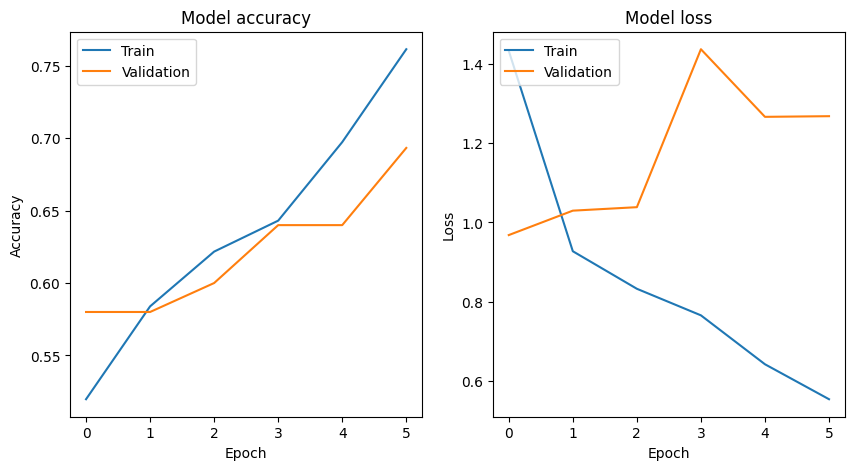

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 306ms/step


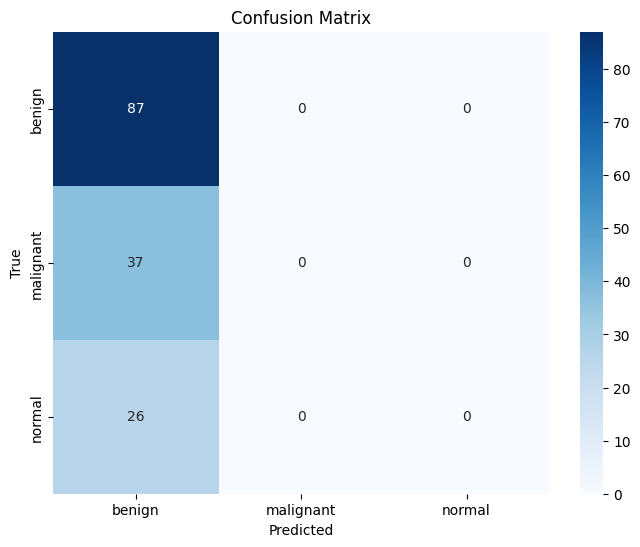

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the validation set
predictions = model.predict(val_generator)
y_pred = np.argmax(predictions, axis=1)

# Get true labels
y_true = val_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(val_generator.class_indices.keys()),
            yticklabels=list(val_generator.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=list(val_generator.class_indices.keys())))

              precision    recall  f1-score   support

      benign       0.58      1.00      0.73        87
   malignant       0.00      0.00      0.00        37
      normal       0.00      0.00      0.00        26

    accuracy                           0.58       150
   macro avg       0.19      0.33      0.24       150
weighted avg       0.34      0.58      0.43       150



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
model.save('/content/drive/MyDrive/dtatset/Models/cnn_breast_cancer_model.h5')

### Testing

In [ ]:
import numpy as np
import cv2
import tensorflow as tf

#load model
model = tf.keras.models.load_model('/content/drive/MyDrive/dtatset/Models/cnn_breast_cancer_model.h5')


In [ ]:
classes= ['benign', 'malignant', 'normal']
image_path = "/content/drive/MyDrive/dataset/Dataset_BUSI_with_GT/malignant/malignant (114).png"

#preporoc4ss the image
IMG_SIZE = 256
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
img = img / 255.0#Only of you used rescale = 1./255 during training
img = np.expand_dims(img, axis=0)

#Predict
predictions = model.predict(img)
print("Raw pediction scores:", predictions)
print("Predicted class:", classes[np.argmax(predictions)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Raw pediction scores: [[6.1023340e-05 9.9993896e-01 1.0508108e-12]]
Predicted class: malignant


## ResNet18

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import os

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet mean
                         std=[0.229, 0.224, 0.225])    # ImageNet std
])


In [ ]:
# Load datasets
!pip install split-folders
import splitfolders  # or import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(data_path, output="output", seed=1337, ratio=(.8, .2), group_prefix=None) # default values

# Correct the data_dir to point to the output folder containing the train and val directories
data_dir = 'output' # Path to the output folder containing train and val subdirectories

train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=transform)
val_dataset = datasets.ImageFolder(os.path.join(data_dir, 'val'), transform=transform)

# No need to reassign data_dir and recreate the datasets, as it is already done above
#data_dir = data_path
#train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=transform)
#val_dataset = datasets.ImageFolder(os.path.join(data_dir, 'val'), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

# ... (rest of the code remains the same) ...

Copying files: 758 files [00:05, 134.30 files/s]


In [ ]:

# Load pretrained ResNet18
model = models.resnet18(pretrained=True)

# Replace final layer to fit 3 classes
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 3)
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    acc = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Accuracy: {acc:.2f}%")

# Evaluation
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

val_acc = 100 * correct / total
print(f"Validation Accuracy: {val_acc:.2f}%")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 42.4MB/s]


Epoch [1/10], Loss: 18.3626, Accuracy: 53.72%
Epoch [2/10], Loss: 3.0017, Accuracy: 95.21%
Epoch [3/10], Loss: 0.6344, Accuracy: 99.67%
Epoch [4/10], Loss: 0.4095, Accuracy: 99.83%
Epoch [5/10], Loss: 0.1544, Accuracy: 100.00%
Epoch [6/10], Loss: 0.1165, Accuracy: 100.00%
Epoch [7/10], Loss: 0.1053, Accuracy: 100.00%
Epoch [8/10], Loss: 0.0553, Accuracy: 100.00%
Epoch [9/10], Loss: 0.0975, Accuracy: 100.00%
Epoch [10/10], Loss: 0.0578, Accuracy: 100.00%
Validation Accuracy: 84.31%


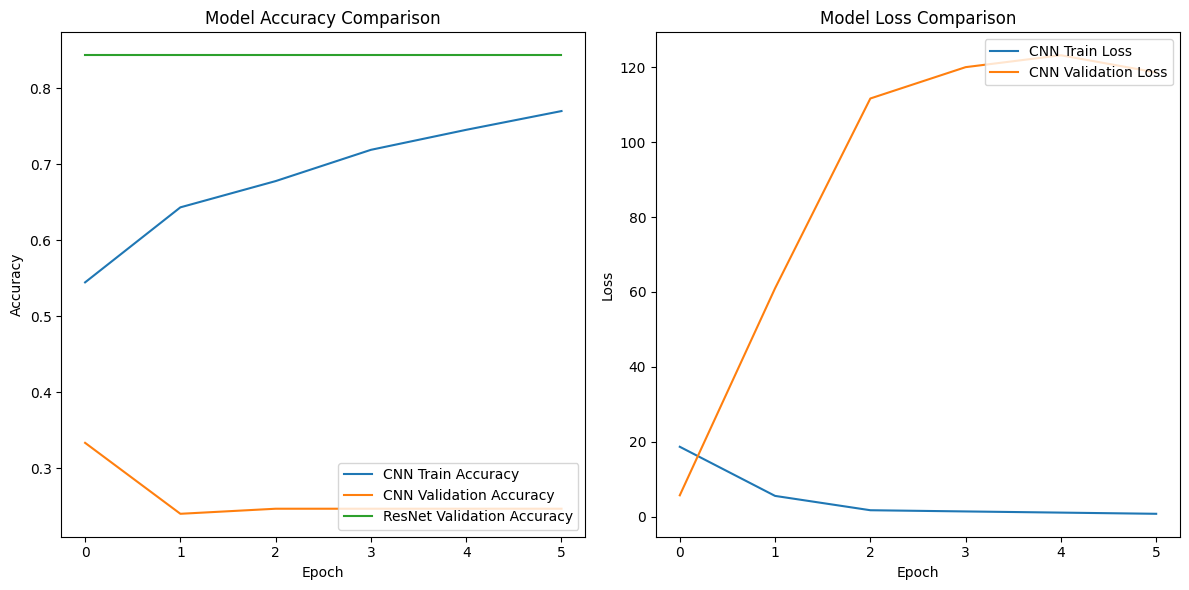

In [ ]:
# prompt: give comparision graphs

# Assuming 'history' is the training history object from model.fit()
# and 'history_resnet' is the training history from the ResNet model

# Assuming you have training history for both models in history and history_resnet

plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='CNN Train Accuracy')
plt.plot(history.history['val_accuracy'], label='CNN Validation Accuracy')


plt.plot(range(len(history.history['accuracy'])),[val_acc/100]*len(history.history['accuracy']),label = 'ResNet Validation Accuracy') # Assuming val_acc is the final ResNet validation accuracy
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='CNN Train Loss')
plt.plot(history.history['val_loss'], label='CNN Validation Loss')

plt.title('Model Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


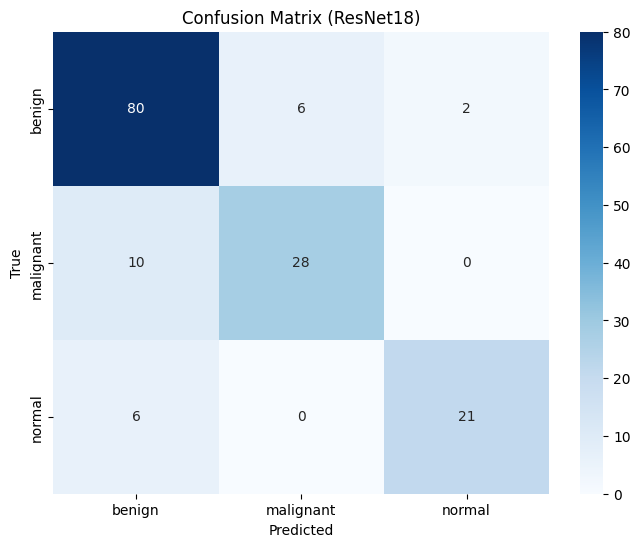

In [ ]:
# prompt: give confision resnet model

# Get predictions for the validation set
y_pred_list = []
y_true_list = []
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_pred_list.extend(predicted.cpu().numpy())
        y_true_list.extend(labels.cpu().numpy())

# Compute the confusion matrix
cm = confusion_matrix(y_true_list, y_pred_list)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_dataset.classes,
            yticklabels=train_dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (ResNet18)')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true_list, y_pred_list, target_names=list(val_generator.class_indices.keys())))

              precision    recall  f1-score   support

      benign       0.83      0.91      0.87        88
   malignant       0.82      0.74      0.78        38
      normal       0.91      0.78      0.84        27

    accuracy                           0.84       153
   macro avg       0.86      0.81      0.83       153
weighted avg       0.84      0.84      0.84       153



## DenseNet121

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 76.5MB/s]


Epoch [1/10] - Loss: 17.1271, Accuracy: 60.50%
Epoch [2/10] - Loss: 6.3905, Accuracy: 94.38%
Epoch [3/10] - Loss: 2.4180, Accuracy: 99.01%
Epoch [4/10] - Loss: 1.0267, Accuracy: 100.00%
Epoch [5/10] - Loss: 0.5613, Accuracy: 100.00%
Epoch [6/10] - Loss: 0.2859, Accuracy: 100.00%
Epoch [7/10] - Loss: 0.2253, Accuracy: 100.00%
Epoch [8/10] - Loss: 0.1569, Accuracy: 100.00%
Epoch [9/10] - Loss: 0.1698, Accuracy: 100.00%
Epoch [10/10] - Loss: 0.1640, Accuracy: 99.83%
DenseNet121 Validation Accuracy: 83.66%


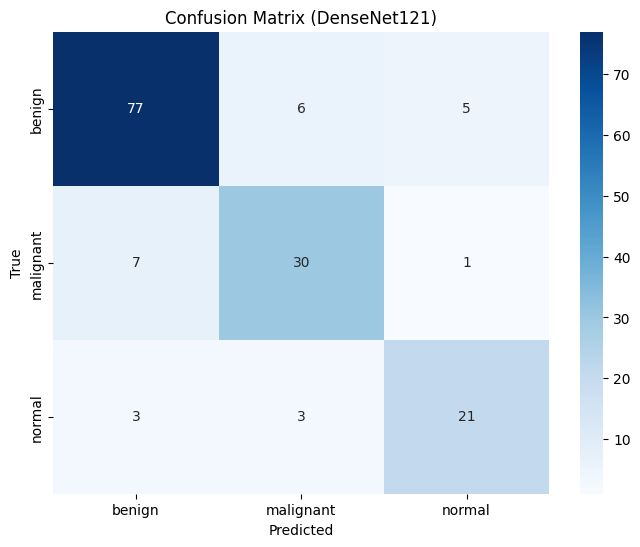

              precision    recall  f1-score   support

      benign       0.89      0.88      0.88        88
   malignant       0.77      0.79      0.78        38
      normal       0.78      0.78      0.78        27

    accuracy                           0.84       153
   macro avg       0.81      0.81      0.81       153
weighted avg       0.84      0.84      0.84       153



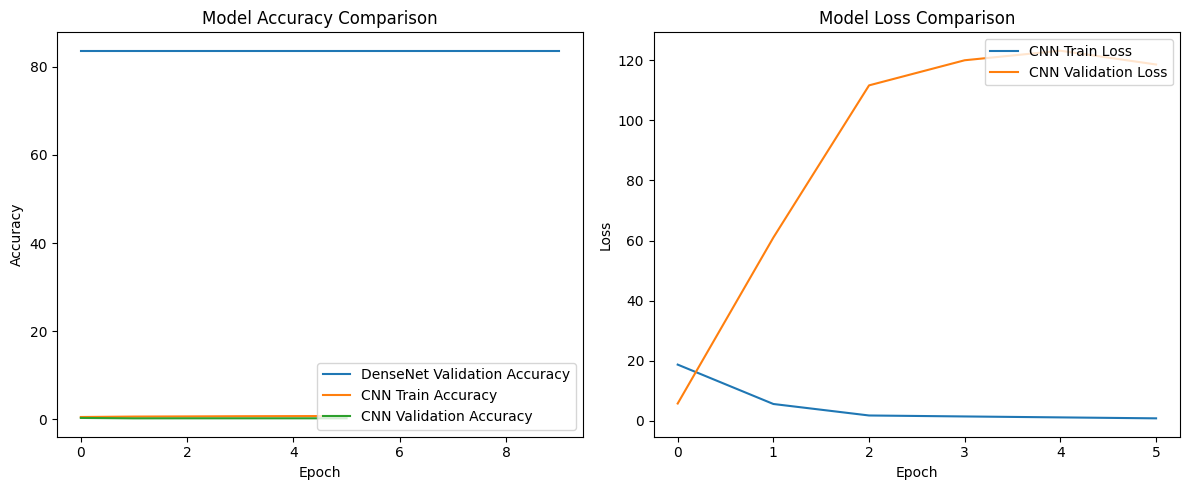

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Dataset paths
data_dir = 'output'
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=transform)
val_dataset = datasets.ImageFolder(os.path.join(data_dir, 'val'), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

# Load DenseNet121
model = models.densenet121(pretrained=True)
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, 3)
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Training
num_epochs = 10
train_losses, val_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    acc = 100 * correct / total
    train_losses.append(running_loss)
    val_accuracies.append(acc)
    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {running_loss:.4f}, Accuracy: {acc:.2f}%")

# Final Evaluation
model.eval()
y_pred_list, y_true_list = [], []
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        y_pred_list.extend(preds.cpu().numpy())
        y_true_list.extend(labels.cpu().numpy())

val_acc_densenet = 100 * sum(torch.tensor(y_pred_list) == torch.tensor(y_true_list)) / len(y_true_list)
print(f"DenseNet121 Validation Accuracy: {val_acc_densenet:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_true_list, y_pred_list)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_dataset.classes,
            yticklabels=train_dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (DenseNet121)')
plt.show()

# Classification Report
print(classification_report(y_true_list, y_pred_list, target_names=train_dataset.classes))

# Plotting Comparison with Custom CNN
plt.figure(figsize=(12, 5))

# Accuracy Comparison
plt.subplot(1, 2, 1)
plt.plot(range(len(train_losses)), [val_acc_densenet]*len(train_losses), label='DenseNet Validation Accuracy')
plt.plot(history.history['accuracy'], label='CNN Train Accuracy')
plt.plot(history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss Comparison
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='CNN Train Loss')
plt.plot(history.history['val_loss'], label='CNN Validation Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 87.7MB/s]


Epoch [1/10] - Loss: 16.5470, Accuracy: 57.19%
Epoch [2/10] - Loss: 10.4137, Accuracy: 76.03%
Epoch [3/10] - Loss: 6.6335, Accuracy: 86.61%
Epoch [4/10] - Loss: 4.7991, Accuracy: 90.58%
Epoch [5/10] - Loss: 3.6952, Accuracy: 93.55%
Epoch [6/10] - Loss: 2.2751, Accuracy: 96.53%
Epoch [7/10] - Loss: 1.6878, Accuracy: 96.69%
Epoch [8/10] - Loss: 0.8531, Accuracy: 98.84%
Epoch [9/10] - Loss: 0.7877, Accuracy: 98.68%
Epoch [10/10] - Loss: 0.5340, Accuracy: 98.84%
VGG 16 Validation Accuracy: 88.24%


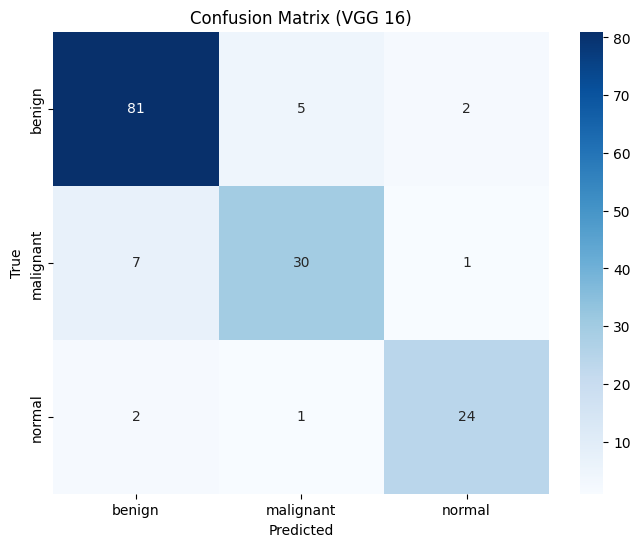

              precision    recall  f1-score   support

      benign       0.90      0.92      0.91        88
   malignant       0.83      0.79      0.81        38
      normal       0.89      0.89      0.89        27

    accuracy                           0.88       153
   macro avg       0.87      0.87      0.87       153
weighted avg       0.88      0.88      0.88       153



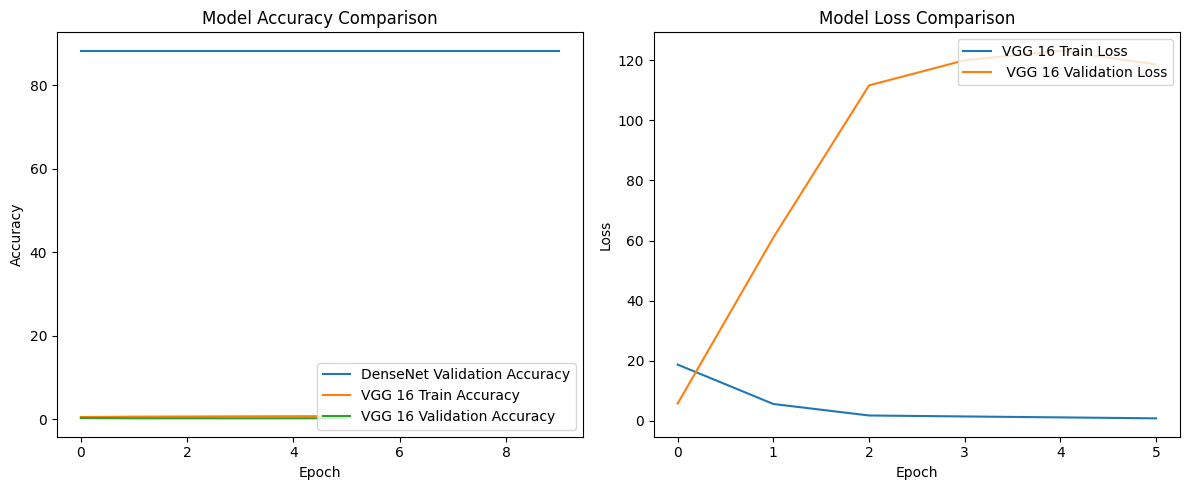

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Dataset paths
data_dir = 'output'
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=transform)
val_dataset = datasets.ImageFolder(os.path.join(data_dir, 'val'), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

# Load DenseNet121
model = models.vgg16(pretrained=True)
num_ftrs = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_ftrs, 3)
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Training
num_epochs = 10
train_losses, val_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    acc = 100 * correct / total
    train_losses.append(running_loss)
    val_accuracies.append(acc)
    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {running_loss:.4f}, Accuracy: {acc:.2f}%")

# Final Evaluation
model.eval()
y_pred_list, y_true_list = [], []
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        y_pred_list.extend(preds.cpu().numpy())
        y_true_list.extend(labels.cpu().numpy())

val_acc_densenet = 100 * sum(torch.tensor(y_pred_list) == torch.tensor(y_true_list)) / len(y_true_list)
print(f"VGG 16 Validation Accuracy: {val_acc_densenet:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_true_list, y_pred_list)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_dataset.classes,
            yticklabels=train_dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (VGG 16)')
plt.show()

# Classification Report
print(classification_report(y_true_list, y_pred_list, target_names=train_dataset.classes))

# Plotting Comparison with Custom CNN
plt.figure(figsize=(12, 5))

# Accuracy Comparison
plt.subplot(1, 2, 1)
plt.plot(range(len(train_losses)), [val_acc_densenet]*len(train_losses), label='DenseNet Validation Accuracy')
plt.plot(history.history['accuracy'], label='VGG 16 Train Accuracy')
plt.plot(history.history['val_accuracy'], label='VGG 16 Validation Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss Comparison
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='VGG 16 Train Loss')
plt.plot(history.history['val_loss'], label=' VGG 16 Validation Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 65.0MB/s]


Epoch [1/10] - Loss: 18.7890, Accuracy: 53.06%
Epoch [2/10] - Loss: 13.4268, Accuracy: 77.69%
Epoch [3/10] - Loss: 9.2760, Accuracy: 87.44%
Epoch [4/10] - Loss: 6.2374, Accuracy: 92.73%
Epoch [5/10] - Loss: 4.0194, Accuracy: 96.03%
Epoch [6/10] - Loss: 2.2970, Accuracy: 98.84%
Epoch [7/10] - Loss: 2.0034, Accuracy: 97.52%
Epoch [8/10] - Loss: 1.3673, Accuracy: 98.68%
Epoch [9/10] - Loss: 0.9768, Accuracy: 99.01%
Epoch [10/10] - Loss: 0.8958, Accuracy: 99.17%
VGG 16 Validation Accuracy: 79.08%


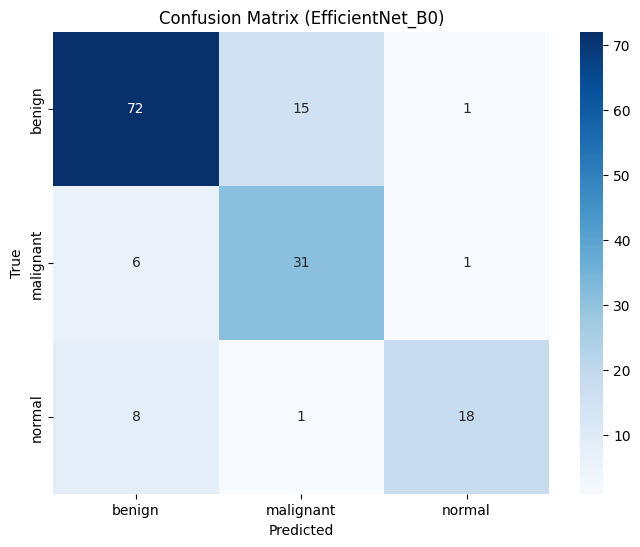

              precision    recall  f1-score   support

      benign       0.84      0.82      0.83        88
   malignant       0.66      0.82      0.73        38
      normal       0.90      0.67      0.77        27

    accuracy                           0.79       153
   macro avg       0.80      0.77      0.77       153
weighted avg       0.80      0.79      0.79       153



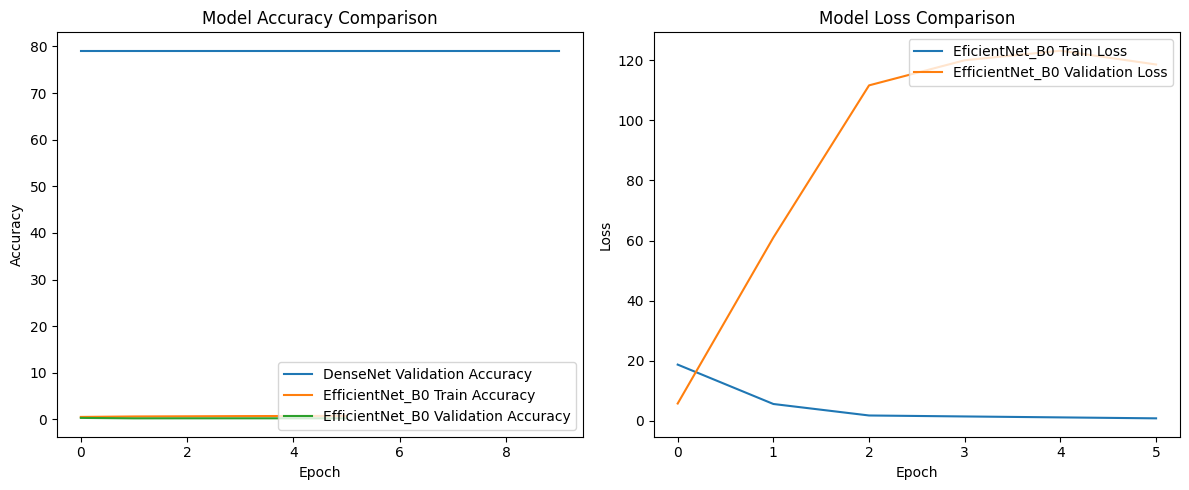

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Dataset paths
data_dir = 'output'
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=transform)
val_dataset = datasets.ImageFolder(os.path.join(data_dir, 'val'), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

# Load DenseNet121
model = models.efficientnet_b0(pretrained=True)
num_ftrs = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_ftrs, 3)
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Training
num_epochs = 10
train_losses, val_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    acc = 100 * correct / total
    train_losses.append(running_loss)
    val_accuracies.append(acc)
    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {running_loss:.4f}, Accuracy: {acc:.2f}%")

# Final Evaluation
model.eval()
y_pred_list, y_true_list = [], []
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        y_pred_list.extend(preds.cpu().numpy())
        y_true_list.extend(labels.cpu().numpy())

val_acc_densenet = 100 * sum(torch.tensor(y_pred_list) == torch.tensor(y_true_list)) / len(y_true_list)
print(f"VGG 16 Validation Accuracy: {val_acc_densenet:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_true_list, y_pred_list)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_dataset.classes,
            yticklabels=train_dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (EfficientNet_B0)')
plt.show()

# Classification Report
print(classification_report(y_true_list, y_pred_list, target_names=train_dataset.classes))

# Plotting Comparison with Custom CNN
plt.figure(figsize=(12, 5))

# Accuracy Comparison
plt.subplot(1, 2, 1)
plt.plot(range(len(train_losses)), [val_acc_densenet]*len(train_losses), label='DenseNet Validation Accuracy')
plt.plot(history.history['accuracy'], label='EfficientNet_B0 Train Accuracy')
plt.plot(history.history['val_accuracy'], label='EfficientNet_B0 Validation Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss Comparison
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='EficientNet_B0 Train Loss')
plt.plot(history.history['val_loss'], label='EfficientNet_B0 Validation Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()